In [ ]:
!pip install beir
!pip install datasets

## Partie 1

Fetch the DBpedia dataset


In [66]:
from tools.utils import download_dbpedia, download_squadv2
from src.preprocess import select_only_50words, create_dataframe_from_squad_and_dbdebia, create_unique_questions, create_question_and_answer
from src.metrics import get_ranks_for_mrr, mean_reciprocal_rank

In [ ]:
corpus, queries, qrels = download_dbpedia()

In [ ]:
dataset_squadv2 = download_squadv2()

In [5]:
words50 = select_only_50words(corpus, queries, qrels)
print(len(words50))

11197


In [6]:
print(words50[:10])

[['El Asher City or Tenth of Ramadan City (Arabic: مدينة العاشر من رمضان\u200e) is a city located in Sharqia governorate in Egypt and follows the Urban Communities Authority. It is one of the cities of the first generation, and one of the largest new industrial cities, located close to the city of Cairo. It was created by Presidential Decree No.', '10th of Ramadan City', 'Which German cities have more than 250000 inhabitants?', ('10th of Ramadan City', 'El Asher City or Tenth of Ramadan City (Arabic: مدينة العاشر من رمضان\u200e) is a city located in Sharqia governorate in Egypt and follows the Urban Communities Authority. It is one of the cities of the first generation, and one of the largest new industrial cities, located close to the city of Cairo. It was created by Presidential Decree No.')], ["Abdul Hafeez Kardar (Urdu: عبد الحفیظ کاردار  \u200e) About this sound pronunciation  or Abdul Kardar (17 January 1925 – 21 April 1996) was an international cricketer, who is one of the only 

In [41]:
df, questions_list, contexts, titles, answers = create_dataframe_from_squad_and_dbdebia(dataset_squadv2, words50)
df

,question,context,title,answers
0,In what country is Normandy located?,The Normans (Norman: Nourmands; French: Norman...,Normans,"{'text': ['France', 'France', 'France', 'Franc..."
1,Who was the duke in the battle of Hastings?,"The Norman dynasty had a major political, cult...",Normans,"{'text': ['William the Conqueror', 'William th..."
2,What is the original meaning of the word Norman?,"The English name ""Normans"" comes from the Fren...",Normans,"{'text': ['Viking', 'Norseman, Viking', 'Norse..."
3,When was the Duchy of Normandy founded?,"In the course of the 10th century, the initial...",Normans,"{'text': ['911', '911', '911'], 'answer_start'..."
4,Who upon arriving gave the original viking set...,"Before Rollo's arrival, its populations did no...",Normans,"{'text': ['Rollo', 'Rollo', 'Rollo'], 'answer_..."
...,...,...,...,...
11795,,The World Meteorological Organization (WMO) is...,,
11796,,The World Veterans Federation (WVF) is the wor...,,
11797,,World Vision International is an Evangelical C...,,
11798,,ZF Electronics GmbH (formerly known as Cherry ...,,


In [8]:
uniques_question = create_unique_questions(questions_list)
uniques_question[:10]

['In what country is Normandy located?',
 'Who was the duke in the battle of Hastings?',
 'What is the original meaning of the word Norman?',
 'When was the Duchy of Normandy founded?',
 'Who upon arriving gave the original viking settlers a common identity?',
 'What was the Norman religion?',
 "What was one of the Norman's major exports?",
 "Who was the Normans' main enemy in Italy, the Byzantine Empire and Armenia?",
 'When did Herve serve as a Byzantine general?',
 'What was the name of the Norman castle?']

In [9]:
question_and_answer = create_question_and_answer(df, uniques_question)
question_and_answer

{'In what country is Normandy located?': [0],
 'Who was the duke in the battle of Hastings?': [1],
 'What is the original meaning of the word Norman?': [2],
 'When was the Duchy of Normandy founded?': [3],
 'Who upon arriving gave the original viking settlers a common identity?': [4],
 'What was the Norman religion?': [5],
 "What was one of the Norman's major exports?": [6],
 "Who was the Normans' main enemy in Italy, the Byzantine Empire and Armenia?": [7],
 'When did Herve serve as a Byzantine general?': [8],
 'What was the name of the Norman castle?': [9],
 'What were the origins of the Raouliii family?': [10],
 'What was the name of the count of Apulia ': [11],
 'Where did the Normans and Byzantines sign the peace treaty?': [12],
 'When did the Normans attack Dyrrachium?': [13],
 'Who did Emma Marry?': [14],
 "Who was Edward the Confessor's half-brother?": [15],
 'Where did Harold II die?': [16],
 "What was the Anglo-Norman language's final form?": [17],
 "In what year did the Norm

## Partie 2

In [ ]:
from sentence_transformers import SentenceTransformer
import sentence_transformers.util
import numpy as np

# Example :

model = SentenceTransformer('msmarco-distilbert-base-v3')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode('London has 9,787,426 inhabitants at the 2011 census')

print("Similarity:", sentence_transformers.util.pytorch_cos_sim(query_embedding, passage_embedding))

In [11]:
from src.model_computation import sentence_transformer_tests, k_nearest_neighbours_context, vector_search, get_embeddings_and_index

In [12]:
results_of_all_model = []

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [20]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-roberta-base-ance-firstp')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [23]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-distilbert-base-tas-b')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [25]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-MiniLM-L-6-v3')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [27]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-MiniLM-L-12-v3')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [29]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-distilbert-base-v3')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [31]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-distilbert-base-v4')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)

In [33]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [ ]:
# TODO : Document the model of your choice
model = SentenceTransformer('msmarco-roberta-base-v3')
result, embeddings, questions_embedding, run_time = sentence_transformer_tests(model, True, df, uniques_question, question_and_answer)



In [35]:
results_of_all_model.append(np.array([result, run_time], dtype=float))

In [36]:
label = ['msmarco-distilbert-base-dot-prod-v3', 'msmarco-roberta-base-ance-firstp', 'msmarco-distilbert-base-tas-b',
         'msmarco-MiniLM-L-6-v3', 'msmarco-MiniLM-L-12-v3', 'msmarco-distilbert-base-v3',
         'msmarco-distilbert-base-v4', 'msmarco-roberta-base-v3']

In [71]:
# TODO : Dataframe and compare the different models time and results
import pandas as pd

indexing = ['MRR', 'Speed (in ms)']

d = {label[0]: results_of_all_model[0], 
                         label[1]: results_of_all_model[1],
                         label[2]: results_of_all_model[2],
                         label[3]: results_of_all_model[3], 
                         label[4]: results_of_all_model[4],
                         label[5]: results_of_all_model[5],
                         label[6]: results_of_all_model[6]}
df_result = pd.DataFrame(d, index=indexing)
df_result

,msmarco-distilbert-base-dot-prod-v3,msmarco-roberta-base-ance-firstp,msmarco-distilbert-base-tas-b,msmarco-MiniLM-L-6-v3,msmarco-MiniLM-L-12-v3,msmarco-distilbert-base-v3,msmarco-distilbert-base-v4
MRR,0.741253,0.714705,0.820465,0.548700,0.542705,0.666517,0.675863
Speed (in ms),626.476235,847.166684,683.559008,609.804595,638.631290,651.541561,660.527240


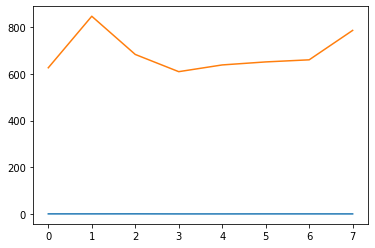

In [72]:
import matplotlib.pyplot as plt

plt.plot(results_of_all_model)
plt.show()

After the exploration phase, we've discovered that the best model is the "msmarco-distilbert-base-tas-b". With a mean reciprocal error of 80%.

So we'll use this one for the rest of this part of the project.

In [40]:
model = SentenceTransformer('msmarco-distilbert-base-tas-b')

embeddings = model.encode(df.context.to_list(), show_progress_bar=True)
questions_embedding = model.encode(uniques_question, show_progress_bar=True)

Batches:   0%|          | 0/369 [00:00<?, ?it/s]

Batches:   0%|          | 0/38 [00:00<?, ?it/s]

In [59]:
embeddings, index = get_embeddings_and_index(embeddings, df)

In [62]:
# Querying the index
D, I = vector_search(uniques_question, model, index, num_results=5)

In [67]:
ranks = get_ranks_for_mrr(question_and_answer, uniques_question, I)
print(mean_reciprocal_rank(ranks))

0.828609341825903
